# Exercise 4: The Deutsch-Josza Algorithm

Complete the following snippets provided in the notebook.

## Imports from the Qiskit package

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import *
from qiskit.quantum_info import state_fidelity
# Magic function to render plots in the notebook after the cell executing the plot command
%matplotlib inline

### Function for convenience which allows for running the simulator and extracting the results

In [2]:
def run_on_qasm_simulator(quantum_circuit, num_shots):
    """Takes a circuit, the number of shots and a backend and returns the counts for running the circuit
    on the qasm_simulator backend."""
    qasm_simulator = Aer.get_backend('qasm_simulator')
    job = execute(quantum_circuit, backend=qasm_simulator, shots=num_shots)
    result = job.result()
    counts = result.get_counts(quantum_circuit)
    return counts

### Oracles implementing the functions

In [3]:
def oracle_f1():
    "Oracle implementing function f1"
    qc = QuantumCircuit(3)
    qc.cnot(0,2)    
    qc.cnot(1,2)    
    qc.x(2)
    qc.cnot(1,2)    
    qc.cnot(0,2)    
    return qc

In [4]:
def oracle_f2():
    "Oracle implementing function f2"
    qc = QuantumCircuit(3)
    qc.cnot(0,2)
    qc.x(2)
    qc.cnot(1,2)
    return qc

##  <font color='orange'>Implementing the Deutsch-Josza algorithm</font>

The goal of this exercise is to understand the Deutsch Josza algorithm for a small instance. We use a oracles implementing the a function acting on two bits, hence, including the ancialla we need 3 qubits. Complete the following task:
1. Visualize the circuit that oracle_f1() implements.
2. Implement the Deutsch-Josza algorithm for the oracle implemented in function oracle_f1(). Visualize the circuit and convince yourself it is correct. Generate a historgram for 100 shots. What do you observe? What does this imply for the function f1 which the oracle implements?
3. Repeat the same tasks for the second oracle.

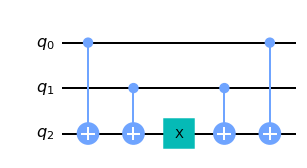

In [5]:
# We visualize the oracle
qc_oracle_f1 = oracle_f1()
qc_oracle_f1.draw('mpl')

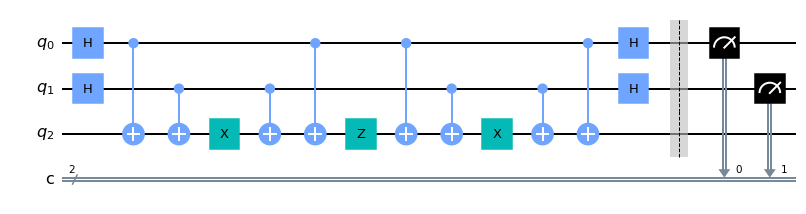

In [6]:
# Create a quantum circuit for 3 qubits and 2 classical registers
qc_deutch_josza_oracle1 = QuantumCircuit(3,2)
# Add the Hadamard gate
qc_deutch_josza_oracle1.h(0)
qc_deutch_josza_oracle1.h(1)
# Apply the oracle
qc_deutch_josza_oracle1 += qc_oracle_f1
# Add the z-gate acting on the ancilla
qc_deutch_josza_oracle1.z(2)
# Apply the oracle again
qc_deutch_josza_oracle1 += qc_oracle_f1
# Add the Hadamard gate
qc_deutch_josza_oracle1.h(0)
qc_deutch_josza_oracle1.h(1)
# Add measurement to the first two qubits
qc_deutch_josza_oracle1.barrier()
qc_deutch_josza_oracle1.measure(range(2),range(2))
# Visualize the circuit
qc_deutch_josza_oracle1.draw(output='mpl')

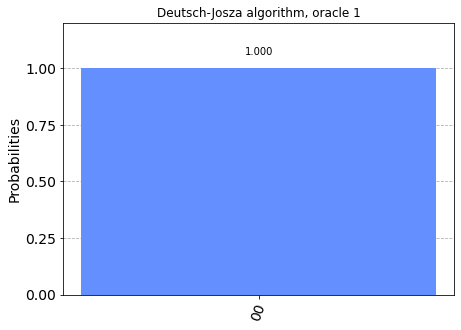

In [7]:
# The number of shots we use
num_shots = 100
# Now we run the circuit
res_qc_deutch_josza_oracle1 = run_on_qasm_simulator(qc_deutch_josza_oracle1, num_shots)
# Visualize the results in form of a histogram
plot_histogram(res_qc_deutch_josza_oracle1, title='Deutsch-Josza algorithm, oracle 1')

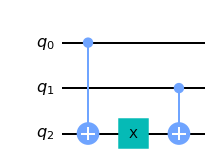

In [8]:
# We visualize the oracle
qc_oracle_f2 = oracle_f2()
qc_oracle_f2.draw('mpl')

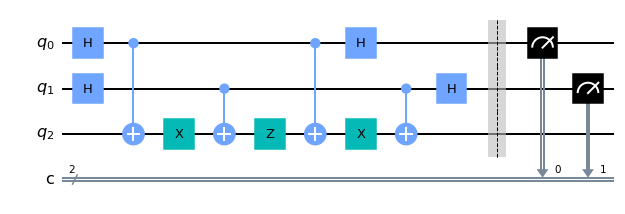

In [9]:
# Create a quantum circuit for 3 qubits and 2 classical registers
qc_deutch_josza_oracle2 = QuantumCircuit(3,2)
# Add the Hadamard gate
qc_deutch_josza_oracle2.h(0)
qc_deutch_josza_oracle2.h(1)
# Apply the oracle
qc_deutch_josza_oracle2 += qc_oracle_f2
# Add the z-gate acting on the ancilla
qc_deutch_josza_oracle2.z(2)
# Apply the oracle again
qc_deutch_josza_oracle2 += qc_oracle_f2
# Add the Hadamard gate
qc_deutch_josza_oracle2.h(0)
qc_deutch_josza_oracle2.h(1)
# Add measurement to the first two qubits
qc_deutch_josza_oracle2.barrier()
qc_deutch_josza_oracle2.measure(range(2),range(2))
# Visualize the circuit
qc_deutch_josza_oracle2.draw(output='mpl')

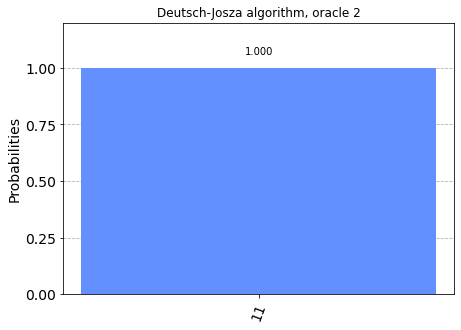

In [10]:
# The number of shots we use
num_shots = 100
# Now we run the circuit
res_qc_deutch_josza_oracle2 = run_on_qasm_simulator(qc_deutch_josza_oracle2, num_shots)
# Visualize the results in form of a histogram
plot_histogram(res_qc_deutch_josza_oracle2, title='Deutsch-Josza algorithm, oracle 2')

## <font color='green'>Optional tasks</font>

Figure out what the functions implemented by the different oracles are doing. How can you do this using the qasm simulator?

To figure out which functions are implemented by the two oracles we can just send the two basis states for two qubits through the oracle and examine the output qubit. The four computational basis states are given by $|00\rangle$, $|01\rangle$, $|10\rangle$ and $|11\rangle$. The last three states can be easily generated from default initial state $|00\rangle$ by a applying an $X$ gate to the respective qubits which we need to be in state $|01\rangle$

In [11]:
# Generate the circuits that are preparing the basis states
qc_00 = QuantumCircuit(3)

# 00
qc_01 = QuantumCircuit(3)
qc_01.x(1)

# 10
qc_10 = QuantumCircuit(3)
qc_10.x(0)

# 11
qc_11 = QuantumCircuit(3)
qc_11.x(0)
qc_11.x(1)

qcs_basis_states = [qc_00, qc_01, qc_10, qc_11]

In [12]:
# The number of shots we are going to use
num_shots = 100
# Prepare empty lists for the results of the two oracles
res_oracle1 = list()
res_oracle2 = list()

# We run the oracles on the basis states and record the outcomes
for qc_basis_state in qcs_basis_states:
    # The quantum circuit sending a basis state through oracle 1 and measuring the output
    qc_oracle1 = QuantumCircuit(3,1)
    qc_oracle1 += qc_basis_state
    qc_oracle1 += oracle_f1()
    qc_oracle1.measure(2,0)
    
    # The quantum circuit sending a basis state through oracle 2 and measuring the output
    qc_oracle2 = QuantumCircuit(3,1)
    qc_oracle2 += qc_basis_state
    qc_oracle2 += oracle_f2()
    qc_oracle2.measure(2,0)
   
    # We run the circuits on the qasm simulator
    res_oracle1.append(run_on_qasm_simulator(qc_oracle1, num_shots))
    res_oracle2.append(run_on_qasm_simulator(qc_oracle2, num_shots))

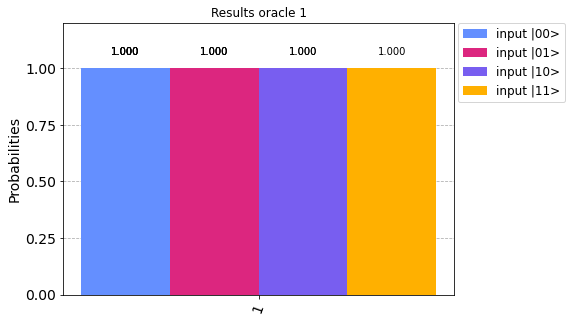

In [13]:
# Visualize the results for oracle 1
plot_histogram(res_oracle1, title='Results oracle 1', legend=['input |00>', 'input |01>', 'input |10>', 'input |11>'])

| x_0 | x_1 | f_1(x_0,x_1) |
| --- | --- | --- |
| 0 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

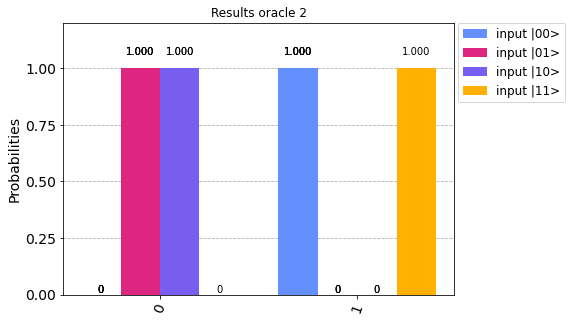

In [14]:
# Visualize the results for oracle 2
plot_histogram(res_oracle2, title='Results oracle 2', legend=['input |00>', 'input |01>', 'input |10>', 'input |11>'])

| x_0 | x_1 | f_2(x_0,x_1) |
| --- | --- | --- |
| 0 | 0 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |